In [1]:
import tensorflow as tf
tf.enable_eager_execution()
import pandas as pd
import csv
import datetime
import os
import operator
import math
from datetime import timedelta 
import numpy as np
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
def dtparser (x): 
    try:
        return pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    except ValueError:
        return pd.datetime.strptime(x, '%Y-%m-%d %H:%M')

In [3]:
data = pd.read_csv('input/out.csv', lineterminator='\n',  parse_dates=['signup_time', 'tweet_created_at' ], date_parser=dtparser)

In [4]:
data.head(100)

,event_id,tweet_id,user_id,screen_name,signup_time,followers_count,friends_count,location,verified,user_description,listed_count,favourites_count,statuses_count,default_profile,listed_count.1,tweet_created_at,tweet_content_text,retweet_count,in_reply_to_status_id_str,in_reply_to_user_id,favorite_count,entities
0,1,371043472397987841,16436153,michaelcorcoran,2008-09-24 15:57:12,3787,2037,"Mediocre, TX",False,"Opinions on everything, but only an authority ...",135,344,10898,False,135,2013-08-23 22:57:12,San Diego mayor resigns amid sexual harassment...,0.0,NaN,NaN,0.0,"{u'symbols': [], u'user_mentions': [], u'hasht..."
1,1,371043478404222976,43337221,MrJaredBarnes,2009-05-29 14:17:51,456,335,Worldwide,False,Im here for a good time not a long time,16,7648,55759,False,16,2013-08-23 22:57:13,RT @CNN: San Diego mayor resigns after sexual ...,157.0,NaN,NaN,0.0,"{u'symbols': [], u'user_mentions': [{u'id': 75..."
2,1,371043512642719744,343055758,wrigleylemons,2011-07-27 00:30:14,59,102,Here and there,False,Attatchment leads to jealousy,0,1487,2257,True,0,2013-08-23 22:57:21,Bye “@CNN: San Diego may...,0.0,3.710414e+17,759251.0,0.0,"{u'symbols': [], u'user_mentions': [{u'id': 75..."
3,1,371043526026752000,456094924,runbaileyrun_,2012-01-05 21:32:38,616,557,WILMINGTON MA,False,"• You are crazy, my child. You must go to Berl...",8,24907,16382,True,8,2013-08-23 22:57:24,RT @BostonGlobe: BREAKING: Embattled San Diego...,14.0,NaN,NaN,0.0,"{u'symbols': [], u'user_mentions': [{u'id': 95..."
4,1,371043523262312448,205143160,JamesVal70,2010-10-20 07:20:06,4980,5419,"San Diego, CA",False,"Christian, Father, Musician,Independent - #The...",98,3722,23834,False,98,2013-08-23 22:57:24,V.CNN BREAKING San Diego City Council accepts ...,0.0,NaN,NaN,0.0,"{u'symbols': [], u'user_mentions': [], u'hasht..."
5,1,371043530598150145,19266265,twocitylife,2009-01-21 00:10:00,1140,1129,San Diego / Palm Desert,False,Curator / Journalist,71,13585,18699,False,71,2013-08-23 22:57:26,"RT @citybeatkelly: So, despite therapy, Filner...",6.0,NaN,NaN,0.0,"{u'symbols': [], u'user_mentions': [{u'id': 60..."
6,1,371043543373975552,489647114,popleibel,2012-02-11 18:56:14,2697,2069,"Punta Arenas, Chile",False,Entre mis recuerdos audiófilos más tempranos (...,199,340931,371901,False,199,2013-08-23 22:57:29,RT @WSJ: Breaking: San Diego Mayor Bob Filner ...,45.0,NaN,NaN,0.0,"{u'symbols': [], u'user_mentions': [{u'id': 31..."
7,1,371043558095982595,37018152,james_laker,2009-05-01 19:23:26,5172,3948,"San Diego, CA",False,No matter the opponents Game Man Listens Own O...,120,22,274838,False,120,2013-08-23 22:57:32,RT @Yahoo: UPDATE: San Diego Mayor #BobFilner ...,6.0,NaN,NaN,0.0,"{u'symbols': [], u'user_mentions': [{u'id': 19..."
8,1,371043556225318912,305223472,LaurenSteussy,2011-05-25 21:13:16,1885,2651,"New York, NY",False,"Features reporter/editor at the New York Post,...",75,1753,4964,False,75,2013-08-23 22:57:32,"RT @citybeatkelly: So, despite therapy, Filner...",6.0,NaN,NaN,0.0,"{u'symbols': [], u'user_mentions': [{u'id': 60..."
9,1,371043567520595968,250378882,eddiekimx,2011-02-11 00:01:49,1520,1398,"Los Angeles, Calif.",False,Writing features for @WeAreMel. Seen/heard in ...,90,9514,18624,False,90,2013-08-23 22:57:34,RT @BostonGlobe: BREAKING: Embattled San Diego...,14.0,NaN,NaN,0.0,"{u'symbols': [], u'user_mentions': [{u'id': 95..."


In [5]:
data.shape

(953360, 22)

In [6]:
data.iloc[0][3] + data.iloc[1][3]

'michaelcorcoranMrJaredBarnes'

In [7]:
str(data.iloc[1]['in_reply_to_status_id_str']) == 'nan'

True

In [8]:
if isinstance(data.iloc[2]['in_reply_to_status_id_str'],str):
    print "hurray"

In [50]:
origin = None

In [51]:
no_tweets=0
tot_tweets=0
no_users=0
no_users_abs=0
no_reinvolve_users=0
possible_reaches_tot=0
retweet_tot=0
reply_tot=0
faviorite_tot=0
word_count=0


In [52]:
for index, row in data.iterrows():
    try:
        row['tweet_created_at'].date()
        origin  = row['tweet_created_at']
        break
    except Exception ,e:
        print e
        continue

In [53]:
usr_set={None}
c_id = 1
steps=10
step_c=0
time_gap_min=1
X=[]
data_point = []

In [54]:
print origin
origin=origin + timedelta(minutes=time_gap_min)
print origin

2013-08-23 22:57:12
2013-08-23 22:58:12


In [55]:
for index, row in data.iterrows():
    print c_id
    if row['event_id']>c_id:
#         print "over drived"
        if (data_point.count>0):
            c_id = row['event_id']
            avg = np.mean(data_point,axis=0)
            print "overdrived-new event{} avg={}".format(row['event_id'],avg)
            if step_c<steps:
                for x in range(step_c,steps):
                    print "avg"
                    data_point.append(avg)
            step_c=0
            X.append(data_point)
            data_point=[]
            tot_tweets=0
            usr_set={None}

            for index2, row2 in data.iloc[index:,:].iterrows():
                try:
                    row2['tweet_created_at'].date()
                    origin  = row2['tweet_created_at']
                    break
                except Exception ,e:
                    print e
                    continue
            origin=origin + timedelta(minutes=time_gap_min)
        else:
            step_c=0
            data_point=[]
            tot_tweets=0
            usr_set={None}

            for index2, row2 in data.iloc[index:,:].iterrows():
                try:
                    row2['tweet_created_at'].date()
                    origin  = row2['tweet_created_at']
                    c_id=row2['event_id']
                    break
                except Exception ,e:
                    continue
            origin=origin + timedelta(minutes=time_gap_min)
        
    
    if row['event_id'] == c_id:
        if row['tweet_created_at']<origin:
            no_tweets=no_tweets+1
            tot_tweets=tot_tweets+1
            no_users= no_users+1
            if row['user_id'] in usr_set:
                no_reinvolve_users=no_reinvolve_users +1
            else:
                usr_set.add(row['user_id'])
                no_users_abs= no_users_abs+1
                possible_reaches_tot=possible_reaches_tot+row['followers_count']
            retweet_tot=retweet_tot+row['retweet_count']
            if str(row['in_reply_to_status_id_str']) == 'nan':
                reply_tot=reply_tot+1
            faviorite_tot = faviorite_tot+row['favourites_count']
            word_count = word_count+len(row['tweet_content_text'].split())
        else:
            if step_c<steps:
                step_c = step_c+1
                ar = [tot_tweets,no_tweets, no_users,no_reinvolve_users,no_users_abs,possible_reaches_tot,retweet_tot,reply_tot,faviorite_tot,word_count]
                data_point.append(ar)
                print ar
                origin=origin+timedelta(minutes=time_gap_min)
                no_tweets=0
                no_users=0
                no_users_abs=0
                no_reinvolve_users=0
                possible_reaches_tot=0
                retweet_tot=0
                reply_tot=0
                faviorite_tot=0
                word_count=0
            else:

                print "perfect-new event{}".format(row['event_id'])
                c_id=c_id+1
                print c_id
                step_c=0
                X.append(data_point)
                data_point=[]
                tot_tweets=0
                usr_set={None}

                for index2, row2 in data.iloc[index:,:].iterrows():
                    try:
                        row2['tweet_created_at'].date()
                        origin  = row2['tweet_created_at']
                        if not c_id<row2['event_id']:
                            c_id=row2['event_id']
                        break
                    except Exception ,e:
                        print e
                        continue
                origin=origin + timedelta(minutes=time_gap_min)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[26, 26, 26, 0, 26, 82797, 1106.0, 25, 1058238, 500]
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[42, 16, 16, 1, 15, 135707, 18.0, 16, 318787, 229]
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[63, 21, 21, 0, 21, 124457, 59.0, 20, 232154, 343]
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[81, 18, 18, 2, 16, 649255, 10.0, 18, 115956, 281]
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[103, 22, 22, 2, 20, 17828, 24.0, 22, 49970, 408]
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[122, 19, 19, 1, 18, 103296, 35.0, 17, 685759, 302]
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[136, 14, 14, 1, 13, 101078, 63.0, 13, 255468, 250]
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[152, 16, 16, 3, 13, 445979, 51.0, 16, 306797, 271]
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
[167, 15, 15, 1, 14, 106361, 40.0, 14, 450632, 281]
1
1
1
1
1
1
1
1
[174, 7, 7, 1, 6, 28409, 57.0, 7, 29227, 128]
1
1
1
1
1
1
1
1
1
1
1
perfect-new event1
2
1
1
1
1
1
1
1
1
1
1
1
[10, 20, 20, 1, 19, 64513, 49.0, 17, 144031, 312]
1
1
1
1

KeyboardInterrupt: 

In [15]:
data2 = pd.read_csv('input/events.csv', lineterminator='\n')
data2.head()

,1,2013-08-23,5,1124,harassment;sexual;mayor;filner;san
0,2,2013-08-24,2,5209,panda;birth
1,3,2013-08-24,4,13287,francisco;mayor;emergency;san
2,4,2013-08-24,2,8307,anniversary;50th
3,5,2013-08-24,2,12488,wildfire;yosemite
4,6,2013-08-24,2,3311,website;dhs


In [16]:
Xx = np.array(X,dtype=float)
Xx.shape

(107, 10, 10)

In [17]:
Y = data2.iloc[:107,3]
Yy=np.array(Y)
Yy.shape

(107,)

In [20]:
for i in range(107):
    for j in range(10):
        print Xx[i,:,j]
        if np.abs(Xx[i,:,j]).max(axis = 0)==0:
            print "zero occurd"
        if np.isnan(Xx[i,:,j]).any():
            print "is nan"

[ 26.  42.  63.  81. 103. 122. 136. 152. 167. 174.]
[26. 16. 21. 18. 22. 19. 14. 16. 15.  7.]
[26. 16. 21. 18. 22. 19. 14. 16. 15.  7.]
[0. 1. 0. 2. 2. 1. 1. 3. 1. 1.]
[26. 15. 21. 16. 20. 18. 13. 13. 14.  6.]
[ 82797. 135707. 124457. 649255.  17828. 103296. 101078. 445979. 106361.
  28409.]
[1106.   18.   59.   10.   24.   35.   63.   51.   40.   57.]
[25. 16. 20. 18. 22. 17. 13. 16. 14.  7.]
[1058238.  318787.  232154.  115956.   49970.  685759.  255468.  306797.
  450632.   29227.]
[500. 229. 343. 281. 408. 302. 250. 271. 281. 128.]
[1584. 1588. 1595. 1597. 1598. 1601. 1606. 1607. 1612. 1617.]
[1.41e+03 4.00e+00 7.00e+00 2.00e+00 1.00e+00 3.00e+00 5.00e+00 1.00e+00
 5.00e+00 5.00e+00]
[1.41e+03 4.00e+00 7.00e+00 2.00e+00 1.00e+00 3.00e+00 5.00e+00 1.00e+00
 5.00e+00 5.00e+00]
[132.   0.   2.   0.   0.   0.   1.   0.   0.   2.]
[1.278e+03 4.000e+00 5.000e+00 2.000e+00 1.000e+00 3.000e+00 4.000e+00
 1.000e+00 5.000e+00 3.000e+00]
[6.394992e+07 1.585000e+03 1.171200e+04 6.387000e+03 1.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[16843. 16843. 16843. 16843. 16843. 16843. 16843. 16843. 16843. 16843.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[16843. 16843. 16843. 16843. 16843. 16843. 16843. 16843. 16843. 16843.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
zero occurd
[0. 0. 0. 0. 0. 0. 0

In [18]:
for i in range(107):
    for j in range(10):
        Xx[i,:,j] = Xx[i,:,j]/np.abs(Xx[i,:,j]).max(axis = 0)

/home/bawa/anaconda3/envs/FYP/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
x_train_single= Xx[:90,]
y_train_single= Yy[:90,]
x_val_single= Xx[90:,]
y_val_single= Yy[90:,]

In [20]:
print x_train_single.shape
print y_train_single.shape

(90, 10, 10)
(90,)


In [21]:
BATCH_SIZE = 2
BUFFER_SIZE = 20
EVALUATION_INTERVAL = 1
EPOCHS = 1000

In [22]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()


In [23]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(50,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mae')


Instructions for updating:
Colocations handled automatically by placer.


In [24]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=5)

Epoch 1/1000
Instructions for updating:
Use tf.cast instead.
1/1 [==============================] - 4s 4s/step - loss: nan - val_loss: nan
Epoch 2/1000
1/1 [==============================] - 0s 114ms/step - loss: nan - val_loss: nan
Epoch 3/1000
1/1 [==============================] - 0s 118ms/step - loss: nan - val_loss: nan
Epoch 4/1000
1/1 [==============================] - 0s 115ms/step - loss: nan - val_loss: nan
Epoch 5/1000
1/1 [==============================] - 0s 124ms/step - loss: nan - val_loss: nan
Epoch 6/1000
1/1 [==============================] - 0s 99ms/step - loss: nan - val_loss: nan
Epoch 7/1000
1/1 [==============================] - 0s 115ms/step - loss: nan - val_loss: nan
Epoch 8/1000
1/1 [==============================] - 0s 107ms/step - loss: nan - val_loss: nan
Epoch 9/1000
1/1 [==============================] - 0s 116ms/step - loss: nan - val_loss: nan
Epoch 10/1000
1/1 [==============================] - 0s 100ms/step - loss: nan - val_loss: nan
Epoch 11/1000
1

Epoch 51/1000
1/1 [==============================] - 0s 105ms/step - loss: nan - val_loss: nan
Epoch 52/1000
1/1 [==============================] - 0s 93ms/step - loss: nan - val_loss: nan
Epoch 53/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 54/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 55/1000
1/1 [==============================] - 0s 104ms/step - loss: nan - val_loss: nan
Epoch 56/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 57/1000
1/1 [==============================] - 0s 86ms/step - loss: nan - val_loss: nan
Epoch 58/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 59/1000
1/1 [==============================] - 0s 93ms/step - loss: nan - val_loss: nan
Epoch 60/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 61/1000
1/1 [==============================] - 0s 96

Epoch 103/1000
1/1 [==============================] - 0s 107ms/step - loss: nan - val_loss: nan
Epoch 104/1000
1/1 [==============================] - 0s 90ms/step - loss: nan - val_loss: nan
Epoch 105/1000
1/1 [==============================] - 0s 93ms/step - loss: nan - val_loss: nan
Epoch 106/1000
1/1 [==============================] - 0s 97ms/step - loss: nan - val_loss: nan
Epoch 107/1000
1/1 [==============================] - 0s 117ms/step - loss: nan - val_loss: nan
Epoch 108/1000
1/1 [==============================] - 0s 129ms/step - loss: nan - val_loss: nan
Epoch 109/1000
1/1 [==============================] - 0s 135ms/step - loss: nan - val_loss: nan
Epoch 110/1000
1/1 [==============================] - 0s 122ms/step - loss: nan - val_loss: nan
Epoch 111/1000
1/1 [==============================] - 0s 98ms/step - loss: nan - val_loss: nan
Epoch 112/1000
1/1 [==============================] - 0s 107ms/step - loss: nan - val_loss: nan
Epoch 113/1000
1/1 [========================

1/1 [==============================] - 0s 106ms/step - loss: nan - val_loss: nan
Epoch 206/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 207/1000
1/1 [==============================] - 0s 86ms/step - loss: nan - val_loss: nan
Epoch 208/1000
1/1 [==============================] - 0s 102ms/step - loss: nan - val_loss: nan
Epoch 209/1000
1/1 [==============================] - 0s 101ms/step - loss: nan - val_loss: nan
Epoch 210/1000
1/1 [==============================] - 0s 92ms/step - loss: nan - val_loss: nan
Epoch 211/1000
1/1 [==============================] - 0s 94ms/step - loss: nan - val_loss: nan
Epoch 212/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 213/1000
1/1 [==============================] - 0s 87ms/step - loss: nan - val_loss: nan
Epoch 214/1000
1/1 [==============================] - 0s 101ms/step - loss: nan - val_loss: nan
Epoch 215/1000
1/1 [==============================] - 0s 97ms

Epoch 257/1000
1/1 [==============================] - 0s 88ms/step - loss: nan - val_loss: nan
Epoch 258/1000
1/1 [==============================] - 0s 93ms/step - loss: nan - val_loss: nan
Epoch 259/1000
1/1 [==============================] - 0s 105ms/step - loss: nan - val_loss: nan
Epoch 260/1000
1/1 [==============================] - 0s 99ms/step - loss: nan - val_loss: nan
Epoch 261/1000
1/1 [==============================] - 0s 111ms/step - loss: nan - val_loss: nan
Epoch 262/1000
1/1 [==============================] - 0s 104ms/step - loss: nan - val_loss: nan
Epoch 263/1000
1/1 [==============================] - 0s 117ms/step - loss: nan - val_loss: nan
Epoch 264/1000
1/1 [==============================] - 0s 127ms/step - loss: nan - val_loss: nan
Epoch 265/1000
1/1 [==============================] - 0s 166ms/step - loss: nan - val_loss: nan
Epoch 266/1000
1/1 [==============================] - 0s 175ms/step - loss: nan - val_loss: nan
Epoch 267/1000
1/1 [=======================

1/1 [==============================] - 0s 103ms/step - loss: nan - val_loss: nan
Epoch 309/1000
1/1 [==============================] - 0s 88ms/step - loss: nan - val_loss: nan
Epoch 310/1000
1/1 [==============================] - 0s 101ms/step - loss: nan - val_loss: nan
Epoch 311/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 312/1000
1/1 [==============================] - 0s 98ms/step - loss: nan - val_loss: nan
Epoch 313/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 314/1000
1/1 [==============================] - 0s 102ms/step - loss: nan - val_loss: nan
Epoch 315/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 316/1000
1/1 [==============================] - 0s 84ms/step - loss: nan - val_loss: nan
Epoch 317/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 318/1000
1/1 [==============================] - 0s 97ms/

1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 361/1000
1/1 [==============================] - 0s 90ms/step - loss: nan - val_loss: nan
Epoch 362/1000
1/1 [==============================] - 0s 91ms/step - loss: nan - val_loss: nan
Epoch 363/1000
1/1 [==============================] - 0s 106ms/step - loss: nan - val_loss: nan
Epoch 364/1000
1/1 [==============================] - 0s 91ms/step - loss: nan - val_loss: nan
Epoch 365/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 366/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 367/1000
1/1 [==============================] - 0s 91ms/step - loss: nan - val_loss: nan
Epoch 368/1000
1/1 [==============================] - 0s 84ms/step - loss: nan - val_loss: nan
Epoch 369/1000
1/1 [==============================] - 0s 107ms/step - loss: nan - val_loss: nan
Epoch 370/1000
1/1 [==============================] - 0s 98ms/s

Epoch 412/1000
1/1 [==============================] - 0s 90ms/step - loss: nan - val_loss: nan
Epoch 413/1000
1/1 [==============================] - 0s 104ms/step - loss: nan - val_loss: nan
Epoch 414/1000
1/1 [==============================] - 0s 97ms/step - loss: nan - val_loss: nan
Epoch 415/1000
1/1 [==============================] - 0s 90ms/step - loss: nan - val_loss: nan
Epoch 416/1000
1/1 [==============================] - 0s 101ms/step - loss: nan - val_loss: nan
Epoch 417/1000
1/1 [==============================] - 0s 90ms/step - loss: nan - val_loss: nan
Epoch 418/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 419/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 420/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 421/1000
1/1 [==============================] - 0s 98ms/step - loss: nan - val_loss: nan
Epoch 422/1000
1/1 [============================

Epoch 464/1000
1/1 [==============================] - 0s 99ms/step - loss: nan - val_loss: nan
Epoch 465/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 466/1000
1/1 [==============================] - 0s 94ms/step - loss: nan - val_loss: nan
Epoch 467/1000
1/1 [==============================] - 0s 91ms/step - loss: nan - val_loss: nan
Epoch 468/1000
1/1 [==============================] - 0s 102ms/step - loss: nan - val_loss: nan
Epoch 469/1000
1/1 [==============================] - 0s 99ms/step - loss: nan - val_loss: nan
Epoch 470/1000
1/1 [==============================] - 0s 88ms/step - loss: nan - val_loss: nan
Epoch 471/1000
1/1 [==============================] - 0s 91ms/step - loss: nan - val_loss: nan
Epoch 472/1000
1/1 [==============================] - 0s 97ms/step - loss: nan - val_loss: nan
Epoch 473/1000
1/1 [==============================] - 0s 92ms/step - loss: nan - val_loss: nan
Epoch 474/1000
1/1 [=============================

Epoch 567/1000
1/1 [==============================] - 0s 98ms/step - loss: nan - val_loss: nan
Epoch 568/1000
1/1 [==============================] - 0s 92ms/step - loss: nan - val_loss: nan
Epoch 569/1000
1/1 [==============================] - 0s 97ms/step - loss: nan - val_loss: nan
Epoch 570/1000
1/1 [==============================] - 0s 94ms/step - loss: nan - val_loss: nan
Epoch 571/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 572/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 573/1000
1/1 [==============================] - 0s 93ms/step - loss: nan - val_loss: nan
Epoch 574/1000
1/1 [==============================] - 0s 105ms/step - loss: nan - val_loss: nan
Epoch 575/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 576/1000
1/1 [==============================] - 0s 91ms/step - loss: nan - val_loss: nan
Epoch 577/1000
1/1 [=============================

Epoch 619/1000
1/1 [==============================] - 0s 97ms/step - loss: nan - val_loss: nan
Epoch 620/1000
1/1 [==============================] - 0s 97ms/step - loss: nan - val_loss: nan
Epoch 621/1000
1/1 [==============================] - 0s 85ms/step - loss: nan - val_loss: nan
Epoch 622/1000
1/1 [==============================] - 0s 107ms/step - loss: nan - val_loss: nan
Epoch 623/1000
1/1 [==============================] - 0s 92ms/step - loss: nan - val_loss: nan
Epoch 624/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 625/1000
1/1 [==============================] - 0s 103ms/step - loss: nan - val_loss: nan
Epoch 626/1000
1/1 [==============================] - 0s 91ms/step - loss: nan - val_loss: nan
Epoch 627/1000
1/1 [==============================] - 0s 97ms/step - loss: nan - val_loss: nan
Epoch 628/1000
1/1 [==============================] - 0s 93ms/step - loss: nan - val_loss: nan
Epoch 629/1000
1/1 [============================

Epoch 671/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 672/1000
1/1 [==============================] - 0s 92ms/step - loss: nan - val_loss: nan
Epoch 673/1000
1/1 [==============================] - 0s 99ms/step - loss: nan - val_loss: nan
Epoch 674/1000
1/1 [==============================] - 0s 93ms/step - loss: nan - val_loss: nan
Epoch 675/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 676/1000
1/1 [==============================] - 0s 102ms/step - loss: nan - val_loss: nan
Epoch 677/1000
1/1 [==============================] - 0s 89ms/step - loss: nan - val_loss: nan
Epoch 678/1000
1/1 [==============================] - 0s 94ms/step - loss: nan - val_loss: nan
Epoch 679/1000
1/1 [==============================] - 0s 94ms/step - loss: nan - val_loss: nan
Epoch 680/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 681/1000
1/1 [=============================

1/1 [==============================] - 0s 94ms/step - loss: nan - val_loss: nan
Epoch 774/1000
1/1 [==============================] - 0s 94ms/step - loss: nan - val_loss: nan
Epoch 775/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 776/1000
1/1 [==============================] - 0s 93ms/step - loss: nan - val_loss: nan
Epoch 777/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 778/1000
1/1 [==============================] - 0s 91ms/step - loss: nan - val_loss: nan
Epoch 779/1000
1/1 [==============================] - 0s 112ms/step - loss: nan - val_loss: nan
Epoch 780/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 781/1000
1/1 [==============================] - 0s 82ms/step - loss: nan - val_loss: nan
Epoch 782/1000
1/1 [==============================] - 0s 97ms/step - loss: nan - val_loss: nan
Epoch 783/1000
1/1 [==============================] - 0s 104ms/s

1/1 [==============================] - 0s 102ms/step - loss: nan - val_loss: nan
Epoch 826/1000
1/1 [==============================] - 0s 86ms/step - loss: nan - val_loss: nan
Epoch 827/1000
1/1 [==============================] - 0s 106ms/step - loss: nan - val_loss: nan
Epoch 828/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 829/1000
1/1 [==============================] - 0s 84ms/step - loss: nan - val_loss: nan
Epoch 830/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 831/1000
1/1 [==============================] - 0s 97ms/step - loss: nan - val_loss: nan
Epoch 832/1000
1/1 [==============================] - 0s 103ms/step - loss: nan - val_loss: nan
Epoch 833/1000
1/1 [==============================] - 0s 93ms/step - loss: nan - val_loss: nan
Epoch 834/1000
1/1 [==============================] - 0s 98ms/step - loss: nan - val_loss: nan
Epoch 835/1000
1/1 [==============================] - 0s 95ms/

Epoch 877/1000
1/1 [==============================] - 0s 100ms/step - loss: nan - val_loss: nan
Epoch 878/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 879/1000
1/1 [==============================] - 0s 97ms/step - loss: nan - val_loss: nan
Epoch 880/1000
1/1 [==============================] - 0s 91ms/step - loss: nan - val_loss: nan
Epoch 881/1000
1/1 [==============================] - 0s 91ms/step - loss: nan - val_loss: nan
Epoch 882/1000
1/1 [==============================] - 0s 90ms/step - loss: nan - val_loss: nan
Epoch 883/1000
1/1 [==============================] - 0s 98ms/step - loss: nan - val_loss: nan
Epoch 884/1000
1/1 [==============================] - 0s 94ms/step - loss: nan - val_loss: nan
Epoch 885/1000
1/1 [==============================] - 0s 98ms/step - loss: nan - val_loss: nan
Epoch 886/1000
1/1 [==============================] - 0s 91ms/step - loss: nan - val_loss: nan
Epoch 887/1000
1/1 [=============================

Epoch 929/1000
1/1 [==============================] - 0s 92ms/step - loss: nan - val_loss: nan
Epoch 930/1000
1/1 [==============================] - 0s 90ms/step - loss: nan - val_loss: nan
Epoch 931/1000
1/1 [==============================] - 0s 89ms/step - loss: nan - val_loss: nan
Epoch 932/1000
1/1 [==============================] - 0s 97ms/step - loss: nan - val_loss: nan
Epoch 933/1000
1/1 [==============================] - 0s 98ms/step - loss: nan - val_loss: nan
Epoch 934/1000
1/1 [==============================] - 0s 95ms/step - loss: nan - val_loss: nan
Epoch 935/1000
1/1 [==============================] - 0s 92ms/step - loss: nan - val_loss: nan
Epoch 936/1000
1/1 [==============================] - 0s 94ms/step - loss: nan - val_loss: nan
Epoch 937/1000
1/1 [==============================] - 0s 90ms/step - loss: nan - val_loss: nan
Epoch 938/1000
1/1 [==============================] - 0s 96ms/step - loss: nan - val_loss: nan
Epoch 939/1000
1/1 [==============================

Epoch 981/1000
1/1 [==============================] - 0s 75ms/step - loss: nan - val_loss: nan
Epoch 982/1000
1/1 [==============================] - 0s 76ms/step - loss: nan - val_loss: nan
Epoch 983/1000
1/1 [==============================] - 0s 75ms/step - loss: nan - val_loss: nan
Epoch 984/1000
1/1 [==============================] - 0s 75ms/step - loss: nan - val_loss: nan
Epoch 985/1000
1/1 [==============================] - 0s 75ms/step - loss: nan - val_loss: nan
Epoch 986/1000
1/1 [==============================] - 0s 75ms/step - loss: nan - val_loss: nan
Epoch 987/1000
1/1 [==============================] - 0s 74ms/step - loss: nan - val_loss: nan
Epoch 988/1000
1/1 [==============================] - 0s 76ms/step - loss: nan - val_loss: nan
Epoch 989/1000
1/1 [==============================] - 0s 84ms/step - loss: nan - val_loss: nan
Epoch 990/1000
1/1 [==============================] - 0s 94ms/step - loss: nan - val_loss: nan
Epoch 991/1000
1/1 [==============================

In [59]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()


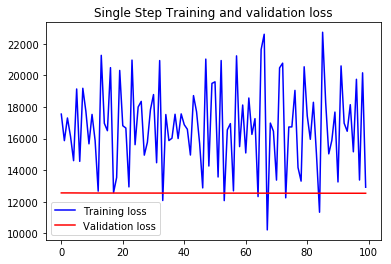

In [156]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')


In [157]:
def create_time_steps(length):
  time_steps = []
  for i in range(-length, 0, 1):
    time_steps.append(i)
  return time_steps


In [158]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt


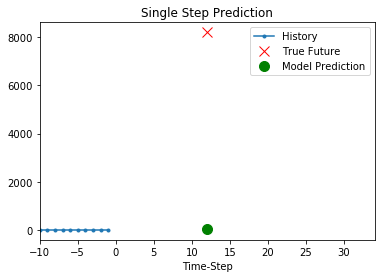

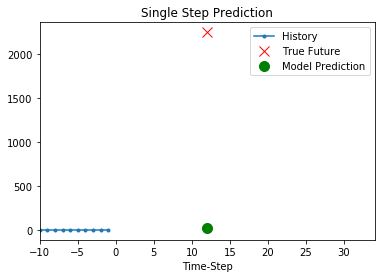

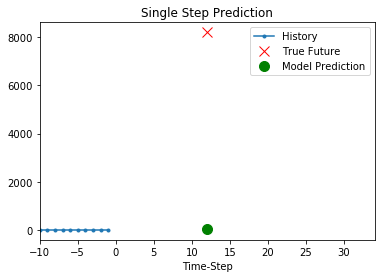

In [159]:
for x, y in val_data_single.take(3):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x.numpy())[0]], 12,
                   'Single Step Prediction')
  plot.show()
